In [7]:
import sys 
sys.path.append("..")


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 
import nxviz as nv

from Leviathan.Island import Island
from Leviathan.Member import Member
from Leviathan.Analyzer import Analyzer
from time import time
from Leviathan.Land import Land
from utils import save
import os

rng = np.random.default_rng()
island = Island(30, (10, 10), 2023)
# island = Island.load_from_pickle("data/Nov/15_13-23/180.pkl")

In [2]:
path = save.datetime_dir("../data")
# path = dir+"test_run/"
# os.mkdir(path)
Island._RECORD_PERIOD = 1

Current save directory: ../data/Mar/10_04-33/


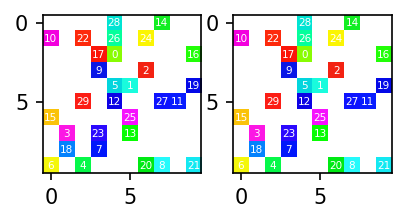

In [5]:
island.land.plot()

In [6]:
action_prob = 0.5

for i in range(50):
    island.new_round(record_path=path)
    island.get_neighbors()
    island.trade(action_prob)
    island.land_distribute(action_prob)
    island.colonize()
    island.consume()
    island.fight(action_prob)
    island.produce()
    island.reproduce(action_prob)
    island.print_status(
        action=True,
        summary=True,
        members=True,
    )

    if island.is_dead:
        break


Natosha(28)对Ashiya(26), offer的决策为True，原因是: High self_cargo and low obj_cargo indicate I have excess resources to offer, and benefiting from past relationships is important for survival.
Ashiya(26)对Lynae(0), offer的决策为True，原因是: High self_cargo and benefit_land_overlap indicate a beneficial opportunity to build alliances.
Ashiya(26)对Keyanna(17), offer的决策为False，原因是: Considering my low self_vitality and high obj_vitality, it's better to conserve food for myself to ensure survival.
Ashiya(26)对Donyetta(9), offer的决策为True，原因是: High self_cargo value and low obj_cargo value indicate that offering food may help improve relations and potentially form alliances, benefiting long-term survival.
Ashiya(26)对Natosha(28), offer的决策为False，原因是: Considering the low obj_vitality and obj_neighbor values, offering food may not be beneficial in this scenario.
Ander(5)对Cleve(12), offer的决策为False，原因是: Based on the low obj_cargo and obj_vitality, it is not beneficial to offer food to the target at this time.
Ander(5)

KeyboardInterrupt: 

## Analyze

##################### 0 #####################
===================== 攻击 =====================
===================== 给予 =====================
==================== 给予土地 ====================
本轮出生：[]
本轮死亡：[]
本轮总给予：0.0
本轮总攻击：0.0
本轮总产量：0.0
本轮总消耗：0.0
本轮活跃比率：[0 0 0 0]
本轮比率历史排位：(0, 0, 0)
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数
	[0, 0] Lynae:        89,   73.9,   33.7   1(1.0%)
	[1, 1] Magdalena:    80,   33.0,   39.2   1(1.0%)
	[2, 2] Neel:         28,   42.2,   32.3   1(1.0%)
	[3, 3] Sharita:      23,   18.5,   37.5   1(1.0%)
	[4, 4] Dora:         91,   78.5,   34.7   1(1.0%)
	[5, 5] Ander:        21,   81.1,   67.0   1(1.0%)
	[6, 6] Kirstin:      55,   83.4,   35.5   1(1.0%)
	[7, 7] Brick:        71,   73.4,   34.4   1(1.0%)
	[8, 8] Caron:        46,   19.4,   7.8   1(1.0%)
	[9, 9] Donyetta:     20,   31.2,   29.4   1(1.0%)
	[10, 10] Norine:       28,   73.4,   55.2   1(1.0%)
	[11, 11] Dustn:        33,   25.3,   64.1   1(1.0%)
	[12, 12] Cleve:        23,   63.9,   30.8   1(1.0%)
	[13, 1

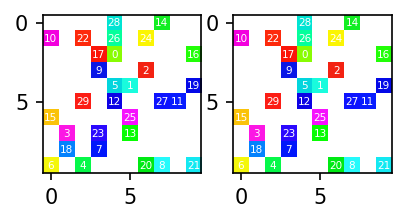

In [8]:
island.print_status(action=True)
island.land.plot()

In [23]:
import random

def decision(params, status):
  # function to make random decisions based on parameters and status
  if random.random() < params[0]:
    return 'attack'
  else:
    return 'help'

def update_status(a, b, decision_a, decision_b):
  # function to update the status of two agents based on their decisions
  if decision_a == 'attack':
    b -= 1
  if decision_b == 'attack':
    a -= 1
  return a, b

def reproduce(params_a, params_b):
  # function to produce new parameters for the offspring
  return (params_a + params_b)/2

# Initialize population with random strategies and random status
population = [(random.random(), random.randint(1, 10)) for i in range(10)]

# simulate for 100 rounds
for i in range(100):
  next_generation = []
  for j in range(0, len(population), 2):
    # make decisions based on parameters and status
    decision_a = decision(*population[j])
    decision_b = decision(*population[j+1])
    # update status based on decisions
    population[j] = update_status(*population[j], decision_a, decision_b)
    population[j+1] = update_status(*population[j+1], decision_b, decision_a)
    # generate offspring
    offspring_params = reproduce(population[j][0], population[j+1][0])
    next_generation.append((offspring_params, (population[j][1] + population[j+1][1])/2))
  population = next_generation


TypeError: 'float' object is not subscriptable

In [18]:
mem11 = island.current_members[1]

In [11]:
def print_sur_id(mem_list):
    sur_id = [mem.surviver_id for mem in mem_list]
    print(sur_id)

def get_pos(mem_list):
    pos = []
    for mem in mem_list:
        for p in mem.owned_land:
            pos.append(p)
    return pos

def assign_color(rgb_map, pos_list, rgb_color):
    """
    rgb_map has shape (land_x, land_y, 3)
    """
    for pos in pos_list:
        rgb_map[pos + (slice(None),)] = rgb_color
    
    return rgb_map

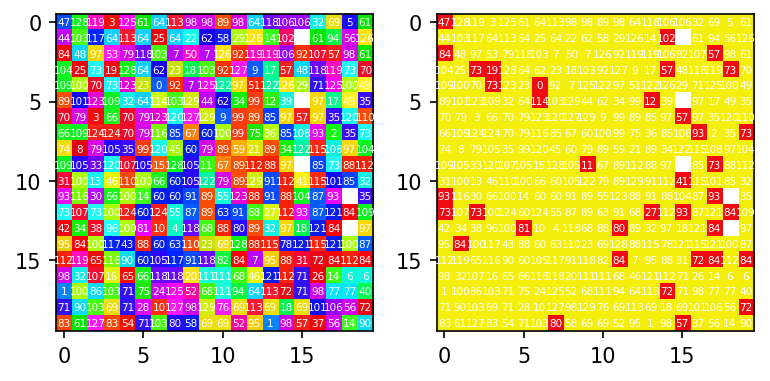

In [16]:
island.land.plot()

island._get_neighbors(mem11)
# print_sur_id(mem11.current_clear_list)
# print(mem11.current_empty_loc_list)
if mem11.current_neighbor_blocked_list != []:
    _, neibor_block = zip(*mem11.current_neighbor_blocked_list)
    print_sur_id(neibor_block)
# print_sur_id(mem11.current_self_blocked_list)

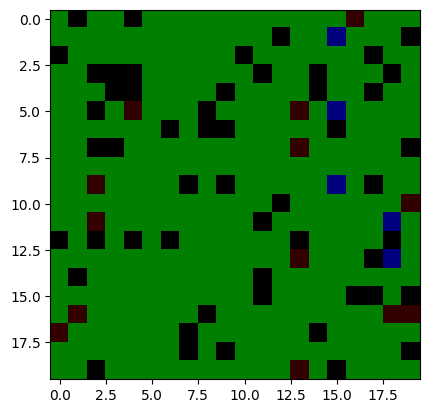

In [19]:
rgb_map = np.zeros((island.land.shape + (3,)))

rgb_map = assign_color(rgb_map, mem11.owned_land, np.array(mem11._color) / 256)
rgb_map = assign_color(rgb_map, get_pos(mem11.current_clear_list), [0.0, 0.5, 0])
rgb_map = assign_color(rgb_map, get_pos(mem11.current_self_blocked_list), [0.5, 0.0, 0])
if mem11.current_neighbor_blocked_list != []:
    rgb_map = assign_color(rgb_map, get_pos(neibor_block), [0.2, 0.0, 0])
rgb_map = assign_color(rgb_map, mem11.current_empty_loc_list, [0, 0, 0.5])


plt.imshow(rgb_map)
plt.show()

In [46]:
mem11.current_neighbor_blocked_list

[(Davena(206), Evelia(294)),
 (Zoraida(275), Evelia(294)),
 (Len(231), Evelia(294)),
 (Kong(254), Aleka(296)),
 (Norma(269), Aleka(296)),
 (Taheerah(246), Aleka(296)),
 (Jecory(267), Evelia(294)),
 (Drew(72), Evelia(294)),
 (Angella(282), Evelia(294)),
 (Dominik(260), Evelia(294)),
 (Iyona(288), Aleka(296)),
 (Sameul(261), Aleka(296)),
 (Benjain(253), Aleka(296)),
 (Amjad(214), Aleka(296)),
 (Javonte(234), Aleka(296)),
 (Javonte(234), Evelia(294)),
 (Kjersten(51), Evelia(294)),
 (Minette(162), Aleka(296)),
 (Ruthy(293), Evelia(294)),
 (Drew(72), Aleka(296)),
 (Terriann(291), Aleka(296)),
 (Aarn(280), Aleka(296)),
 (Zoraida(275), Aleka(296))]

In [53]:
ana = Analyzer(island)
ana.clear_graph()

In [54]:
island.current_members

[Anastassia(26),
 Chenoa(37),
 Kjersten(51),
 Shirita(58),
 Song(63),
 Drew(72),
 Phoenicia(106),
 Edelmiro(122),
 Mrk(131),
 Tavon(145),
 Lavina(147),
 Shaneaka(161),
 Minette(162),
 Ramie(201),
 Davena(206),
 Jaffar(207),
 Amjad(214),
 Edrick(224),
 Janiqua(225),
 Marlow(229),
 Len(231),
 Javonte(234),
 Stefania(238),
 Taheerah(246),
 Yee(248),
 Kineta(250),
 Benjain(253),
 Kong(254),
 Chandelle(255),
 Ji(257),
 Errick(258),
 Dominik(260),
 Sameul(261),
 Shenika(262),
 Mareesa(263),
 Ronald(264),
 Daphne(265),
 Alysa(266),
 Jecory(267),
 Shannan(268),
 Norma(269),
 Abdulaziz(270),
 Kayvon(271),
 Antwaine(272),
 Shanne(273),
 Weldon(274),
 Zoraida(275),
 Jevon(276),
 Willam(277),
 Aaran(278),
 Rattana(279),
 Aarn(280),
 Can(281),
 Angella(282),
 Aadil(283),
 Chalon(284),
 Everson(285),
 Rindi(286),
 Sherrika(287),
 Iyona(288),
 Jace(289),
 Sevag(290),
 Terriann(291),
 Kailani(292),
 Ruthy(293),
 Evelia(294),
 Sioban(295),
 Aleka(296)]

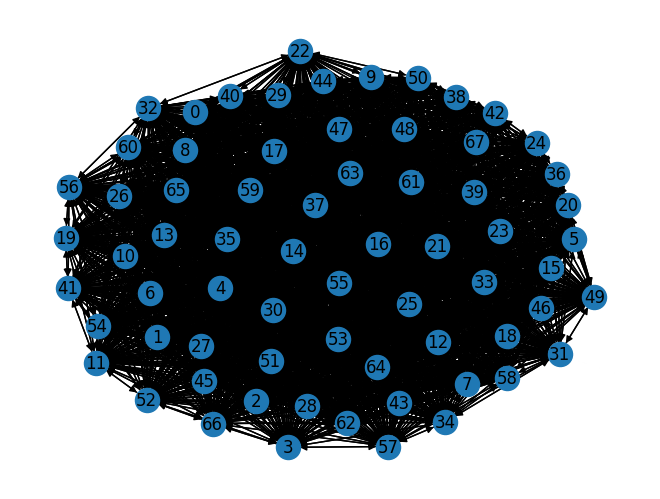

In [55]:
nx.draw(ana.clear_graph, with_labels=True)
plt.show()

In [56]:
island.all_members[2].surviver_id

In [57]:
island.new_round()
island.consume()
island.print_status()


##################### 21 #####################
本轮出生：[]
本轮死亡：[]
本轮总给予：0.0
本轮总攻击：0.0
本轮总产量：0.0
本轮总消耗：1044.8
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数
	[26, 0] Anastassia:   67,   33.0,   0.0   4(1.0%)
	[37, 1] Chenoa:       46,   25.9,   0.0   2(0.5%)
	[51, 2] Kjersten:     69,   33.2,   0.0   9(2.2%)
	[58, 3] Shirita:      38,   31.3,   0.0   4(1.0%)
	[63, 4] Song:         46,   38.3,   0.0   4(1.0%)
	[72, 5] Drew:         36,   42.2,   0.0   9(2.2%)
	[106, 6] Phoenicia:    50,   42.9,   0.0   2(0.5%)
	[122, 7] Edelmiro:     38,   33.1,   0.0   5(1.2%)
	[131, 8] Mrk:          59,   21.8,   0.0   2(0.5%)
	[145, 9] Tavon:        31,   33.2,   0.0   8(2.0%)
	[147, 10] Lavina:       49,   21.0,   0.0   1(0.2%)
	[161, 11] Shaneaka:     65,   38.6,   0.0   6(1.5%)
	[162, 12] Minette:      48,   20.3,   0.0   1(0.2%)
	[201, 13] Ramie:        19,   46.3,   0.0   5(1.2%)
	[206, 14] Davena:       19,   47.1,   0.0   6(1.5%)
	[207, 15] Jaffar:       19,   43.8,   0.0   8(2.0%)
	[214, 16] Amjad

In [58]:
morgen = island.member_by_name("Morgen")

In [59]:
island._get_neighbors(morgen)

In [60]:
morgen.current_empty_loc_list

[]

In [61]:
boy.owned_land

NameError: name 'boy' is not defined

In [62]:
island._discard_land(marv, (1, 1))

NameError: name 'marv' is not defined

In [63]:
island.land

array([[Abdulaziz(270), Chandelle(255), Ji(257), Rattana(279),
        Chandelle(255), Chandelle(255), Antwaine(272), Aadil(283),
        Stefania(238), Abdulaziz(270), Marlow(229), Marlow(229),
        Kjersten(51), Javonte(234), Dominik(260), Shannan(268),
        Alysa(266), Ramie(201), Taheerah(246), Norma(269)],
       [Shannan(268), Taheerah(246), Mareesa(263), Mareesa(263),
        Chandelle(255), Sioban(295), Ji(257), Jaffar(207), Rindi(286),
        Chalon(284), Marlow(229), Marlow(229), Dominik(260),
        Edelmiro(122), Javonte(234), Javonte(234), Terriann(291),
        Ramie(201), Ramie(201), Anastassia(26)],
       [Rattana(279), Everson(285), Mareesa(263), Chandelle(255),
        Chandelle(255), Kayvon(271), Jaffar(207), Jaffar(207),
        Shenika(262), Aadil(283), Javonte(234), Javonte(234),
        Javonte(234), Javonte(234), Javonte(234), Javonte(234),
        Daphne(265), Ramie(201), Ramie(201), Anastassia(26)],
       [Anastassia(26), Chalon(284), Ji(257), Ji(257

In [67]:
rng.choice(range(10), 3, replace=False)

array([7, 8, 1])

In [68]:
m1 = Member("1", id=1, surviver_id=0, rng=rng)
m2 = Member("2", id=2, surviver_id=0, rng=rng)
m3 = Member("3", id=3, surviver_id=0, rng=rng)
m4 = Member("4", id=4, surviver_id=0, rng=rng)
m5 = Member("5", id=5, surviver_id=0, rng=rng)
m6 = Member("6", id=6, surviver_id=0, rng=rng)
m7 = Member("7", id=7, surviver_id=0, rng=rng)
m8 = Member("8", id=8, surviver_id=0, rng=rng)

In [69]:
land = Land((6, 5))
land.owner = [
    [None, m1, m1, None, m1],
    [m1, m1, m3, m5, m5],
    [m6, m6, m4, m4, m1],
    [m7, m1, None, m1, m1],
    [m1, m1, m1, m1, m1],
    [m4, m8, m2, m1, m1],
]

In [70]:
clear_list = []
self_blocked_list = []
neighbor_blocked_list = []
empty_loc_list = []

is_passed = np.zeros((6, 5))

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (2, 2),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (5, 0),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)
print(empty_loc_list)

TypeError: Land._find_neighbors() missing 1 required positional argument: 'max_iter'

In [ ]:
1 == True

True

In [ ]:
os.mkdir("test1/0/")

In [ ]:
island = Island(50, random_seed=2022)

In [ ]:
island.fight()
island.trade()

In [ ]:
island.save_current_island("test_")

In [ ]:
x.save_to_row()

attack
offer
reproduce


,name,surviver_id,productivity,vitality,cargo,age,attack_self_productivity,attack_self_vitality,attack_self_cargo,attack_self_age,...,reproduce_obj_productivity,reproduce_obj_vitality,reproduce_obj_cargo,reproduce_obj_age,reproduce_victim_overlap,reproduce_benefit_overlap,reproduce_victim_passive,reproduce_victim_active,reproduce_benefit_passive,reproduce_benefit_active
0,Marvell,0,14.493567,26.657547,37.384384,89,0.054261,0.695186,0.868202,0.0,...,0.270527,0.620712,0.270702,0.0,0.738614,0.408641,-0.314751,-0.615778,0.949761,0.262216


In [ ]:
island.new_round()

In [ ]:
island.produce()

In [ ]:
island.fight()

In [ ]:
island.consume()

In [ ]:
island.relationship_dict["benefit"][26, 18]

In [ ]:
island.trade()

In [ ]:
island.trade()
island.print_info()

In [ ]:
island.relationship_dict["benefit"][1, 48]

In [ ]:
island.new_round()

In [ ]:
for mem in groups[0]:
    for obj in groups[0]:
        if mem is not obj:
            print(mem, obj, mem.decision("fight", obj, island))


In [ ]:
member1 = island.all_members[0]
member2 = island.all_members[1]

In [ ]:
member1.fight_parameter

In [ ]:
member1.fight_parameter[0] = 0
member1.parameter_dict["fight"]

In [ ]:
inputs = list(member1._generate_decision_inputs(member2, island).values())
member1._decision(member1.fight_parameter, inputs)

In [ ]:
range(1, 10)

In [ ]:
Member.born(island.all_members[0], island.all_members[1])

In [ ]:
a = [1, 2, 3, 4]
np.repeat(a, 2)

In [ ]:
a = ["a", "b"]
b = [np.random.rand(2), np.random.rand(2)]
d = dict(zip(a, b))
d

In [ ]:
n = {key: d[key] for key in d.keys()}
n

In [ ]:
class foo:
    def __init__(self, a):
        self.a = a

    @property
    def return_a(self):
        return self.a * 2

In [ ]:
x = foo(1)
x.return_a

In [ ]:
island = Island(42, random_seed=2022)
island.fight()

In [ ]:
# seed = time()
rng = np.random.default_rng(2022)

In [ ]:
rng.random(1)

In [ ]:
def f(x: np.ndarray):
    print(x)

In [ ]:
(np.array([None, 1]) == None).any()

In [ ]:
b = np.array([[0], [1]])
c = np.array([[10], [100]])
a = [b, c]
a

In [ ]:
for idx in range(len(a)):
    a[idx].resize(1, refcheck=False)

a

In [ ]:
b

In [ ]:
island = Island(4)
print(island.victim_memory)
np.fill_diagonal(island.victim_memory, np.nan)
print(island.victim_memory)


In [ ]:
somebody_die = [island.current_members[3], island.current_members[2]]

In [ ]:
somebody_born = [Member("aha", 1, None), Member("aha", 99, None)]

In [ ]:
print(island.all_members)
print(island.current_members)
print(island.victim_memory)
print(island.benefit_memory)

In [ ]:
island.member_list_modify(somebody_born, somebody_die, np.zeros((2, 4)), np.zeros((4, 2)))
print(island.all_members)
print(island.current_members)
print(island.current_member_num)
print(island.victim_memory)
print(island.benefit_memory)
print(island.current_members[-1].surviver_id)
print(island.all_members[-1].surviver_id)
print(island.all_members[-1].id)

In [ ]:
a = np.random.rand(5, 5)
a

In [ ]:
a = np.delete(a, (1, 2), axis=0)
a = np.delete(a, (1, 2), axis=1)
a

In [ ]:
a = np.delete(a, (1), axis=1)
a

In [ ]:
b = a[0]
b

In [ ]:
np.sort(b)[::-1]

In [ ]:
island = Island(10)
print(island.all_members)


In [ ]:
island.all_members
print(island.current_members)

In [ ]:
island.all_members[0].name = "aaaaa"
print(island.all_members)
print(island.current_members)

In [ ]:
np.random.seed(1)
x = np.random.random(10)
print(x)
print(np.random.normal(x[0], 1, 10))

In [ ]:
a = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
a.append([[9, 0], [1, 2]])
arr = np.array(a)
arr.reshape(3, 4)

In [ ]:
arr.reshape(3, 2, 2)

In [ ]:
pd.DataFrame([[1,2,3],[4,5,6]], index=['a','b'], columns=["g", 'h', 'j'])

In [ ]:
a = ["a", "b", "c"]
np.random.shuffle(a)
a

In [ ]:
a = np.array([0, 1, 2, 3])
b = [True, False, True, False]
a[b]

In [ ]:
plt.plot([1 ,2 ,3], [1, 2, None])

In [ ]:
print(plt.cm.RdYlGn)

In [ ]:
list = np.array([1, 2, 3 ,4, 5])
list[list < 3] = 0
list

In [ ]:
list = ['iarry', 'harry', 'hbrry']
arg_sort_list = np.argsort(list)
arg_sort_list

In [ ]:
list = [list[i] for i in arg_sort_list]
list

In [ ]:
np.split((np.arange(10)), 2)

In [ ]:
mat = np.random.rand(3, 3)
mat = [[1, 2, 3], [2, 0, 4], [1, 2, 1]]
mat

In [ ]:
max_mat_element = np.argmax(np.sum(mat, 1))
max_mat_element

In [ ]:
class test_class:
    def __init__(self):
        self.att = 1

def change(cl):
    cl.att = 2

a = test_class()
change(a)
a.att

In [ ]:
str = ""
str == ""

In [ ]:
np.random.choice([1, 2, 3], size=1, p = [1, 2, 3])